# **Experiment 1**

## Context
Using a dataset with customer demographics and vehicle service history, we aim to train a Logistic Regression model to predict whether customers will purchase more than one vehicle, aiding in targeted marketing efforts for potential repeat buyers.


### 0. Import Packages

In [1]:
! pip install -r https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 17.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.1.1 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings

warnings.filterwarnings('ignore')

### 1.   Load Dataset

In [4]:
from google.colab import drive

drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [5]:
%cd /content/gdrive/MyDrive/ColabNotebooks/UTS_III/MLAA/MLAA_AT2/

/content/gdrive/MyDrive/ColabNotebooks/UTS_III/MLAA/MLAA_AT2


In [6]:
file_url = 'repurchase_dataset.csv'

In [7]:
df = pd.read_csv(file_url)

### 2. Explore Dataset

In [8]:
df.shape #display the number of rows and cols of data

(131337, 17)

In [9]:
df.info() #display information of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131337 entries, 0 to 131336
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   ID                         131337 non-null  int64 
 1   Target                     131337 non-null  int64 
 2   age_band                   18962 non-null   object
 3   gender                     62029 non-null   object
 4   car_model                  131337 non-null  object
 5   car_segment                131337 non-null  object
 6   age_of_vehicle_years       131337 non-null  int64 
 7   sched_serv_warr            131337 non-null  int64 
 8   non_sched_serv_warr        131337 non-null  int64 
 9   sched_serv_paid            131337 non-null  int64 
 10  non_sched_serv_paid        131337 non-null  int64 
 11  total_paid_services        131337 non-null  int64 
 12  total_services             131337 non-null  int64 
 13  mth_since_last_serv        131337 non-null  

In [10]:
df.describe() #summary of data

,ID,Target,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
count,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000
mean,77097.384180,0.026809,5.493022,5.452500,5.472517,5.452287,5.497050,5.481692,5.454967,5.469807,5.502836,5.485438,5.480778
std,44501.636704,0.161525,2.843299,2.884328,2.870665,2.886528,2.878699,2.880408,2.875961,2.859756,2.854896,2.876772,2.867524
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,38563.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,77132.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,115668.000000,0.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,154139.000000,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [11]:
df.head() #display first 5 data

,ID,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
0,1,0,3. 35 to 44,Male,model_1,LCV,9,2,10,3,7,5,6,9,8,10,4
1,2,0,NaN,NaN,model_2,Small/Medium,6,10,3,10,4,9,10,6,10,7,10
2,3,0,NaN,Male,model_3,Large/SUV,9,10,9,10,9,10,10,7,10,6,10
3,5,0,NaN,NaN,model_3,Large/SUV,5,8,5,8,4,5,6,4,10,9,7
4,6,0,NaN,Female,model_2,Small/Medium,8,9,4,10,7,9,8,5,4,4,9


In [12]:
df.isna().sum() # count number of missing of values in each variable

ID                                0
Target                            0
age_band                     112375
gender                        69308
car_model                         0
car_segment                       0
age_of_vehicle_years              0
sched_serv_warr                   0
non_sched_serv_warr               0
sched_serv_paid                   0
non_sched_serv_paid               0
total_paid_services               0
total_services                    0
mth_since_last_serv               0
annualised_mileage                0
num_dealers_visited               0
num_serv_dealer_purchased         0
dtype: int64

### 3. Explore Target variable

In [13]:
target = 'Target'

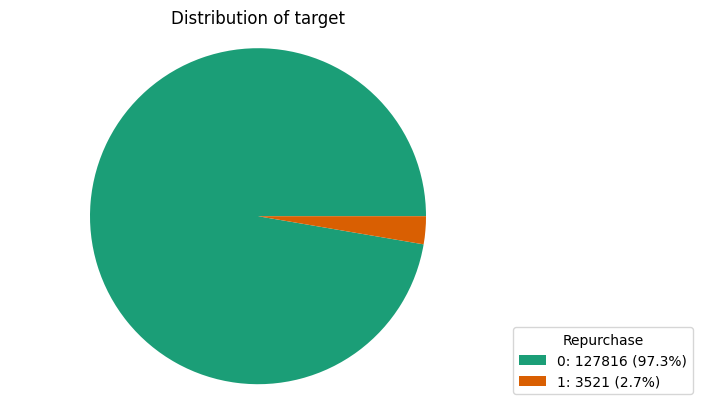

In [14]:
# Plot pie chart to see distribution of car purchasing customer
target_count = df.Target.value_counts()
bar_plot, texts = plt.pie(x=target_count.values, colors=plt.cm.Dark2(range(len(target_count))))
legend_labels = [f'{label}: {value} ({value/sum(target_count.values)*100:.1f}%)' for label, value in zip(target_count.index, target_count.values)]
plt.legend(bar_plot, legend_labels, title='Repurchase', loc='lower left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.title(f'Distribution of target')
plt.axis('equal')
plt.show()

The pie chart clearly indicates that the dataset is imbalanced.

### 4. Explore Variables of Interest

In [15]:
cat_cols = ['car_model', 'car_segment'] # List of columns which are categorical and non-missing bvalues

In [16]:
# Display categorical columns and it's unique values
for cols in cat_cols:
  print(cols)
  print(df[cols].unique())

car_model
['model_1' 'model_2' 'model_3' 'model_5' 'model_6' 'model_4' 'model_7'
 'model_8' 'model_9' 'model_10' 'model_11' 'model_13' 'model_12'
 'model_14' 'model_15' 'model_16' 'model_17' 'model_18' 'model_19']
car_segment
['LCV' 'Small/Medium' 'Large/SUV' 'Other']


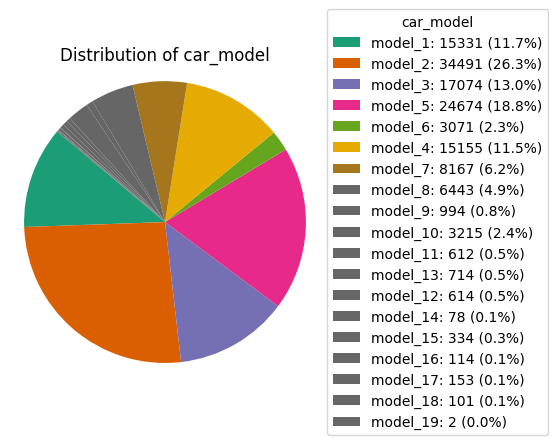

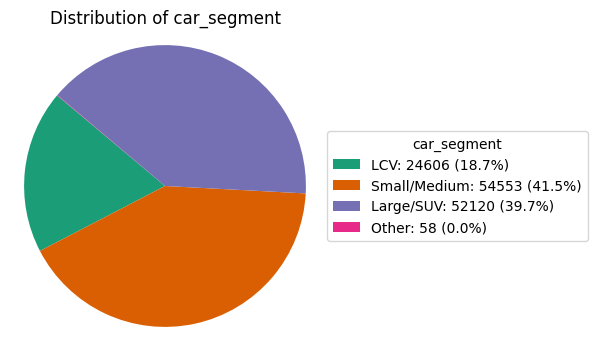

In [17]:
# Plot distribution categorical columns
for cols in cat_cols:
    cat_cols_count = df[cols].value_counts(dropna=False, sort=False)
    plt.figure(figsize=(4, 4))
    wedges, texts = plt.pie(cat_cols_count.values, startangle=140, colors=plt.cm.Dark2(range(len(cat_cols_count))))
    legend_labels = [f'{label}: {value} ({value/sum(cat_cols_count.values)*100:.1f}%)' for label, value in zip(cat_cols_count.index, cat_cols_count.values)]
    plt.legend(wedges, legend_labels, title=cols, loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
    plt.title(f'Distribution of {cols}')
    plt.axis('equal')
    plt.show()

In [18]:
ord_cols = [x for x in df.columns if x != 'ID' and x != target and x not in cat_cols] #Create a list of ordinal categorical values

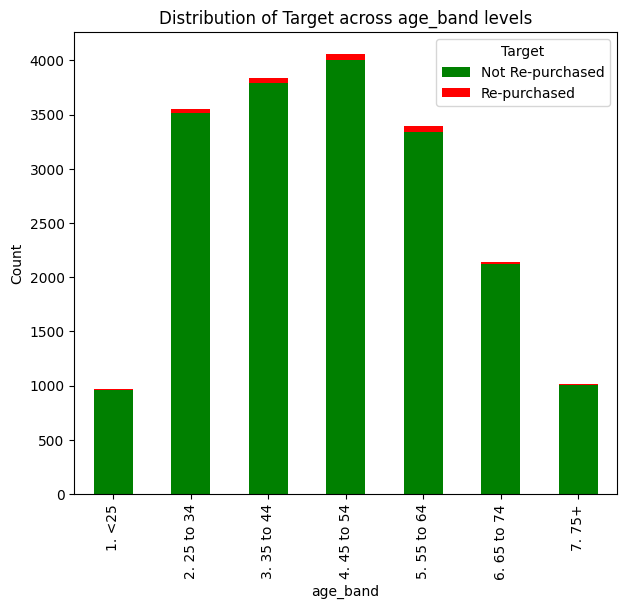

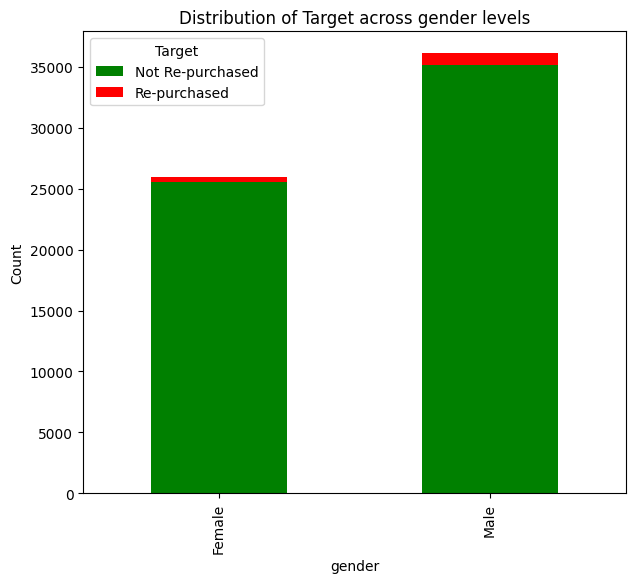

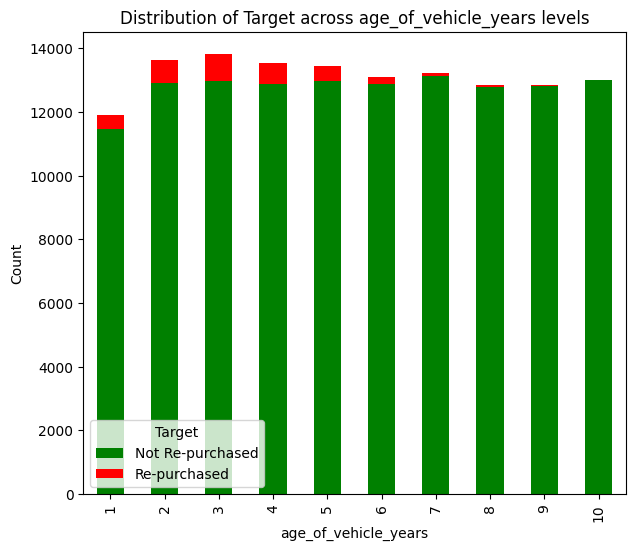

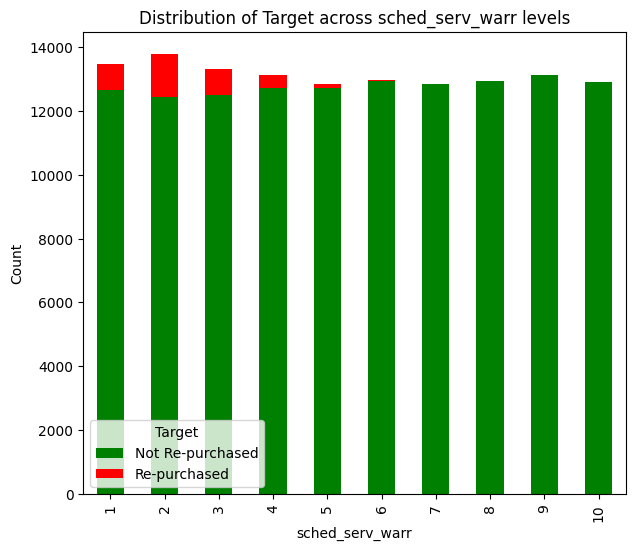

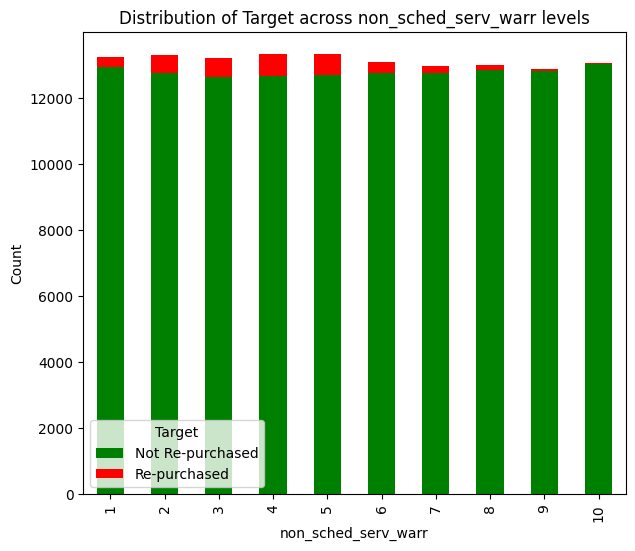

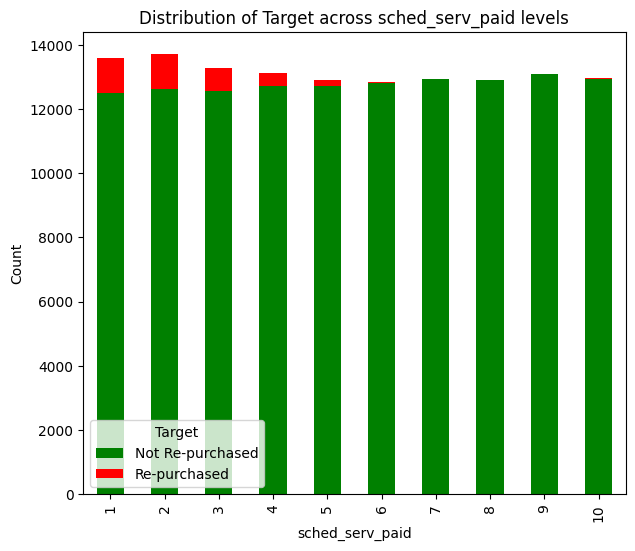

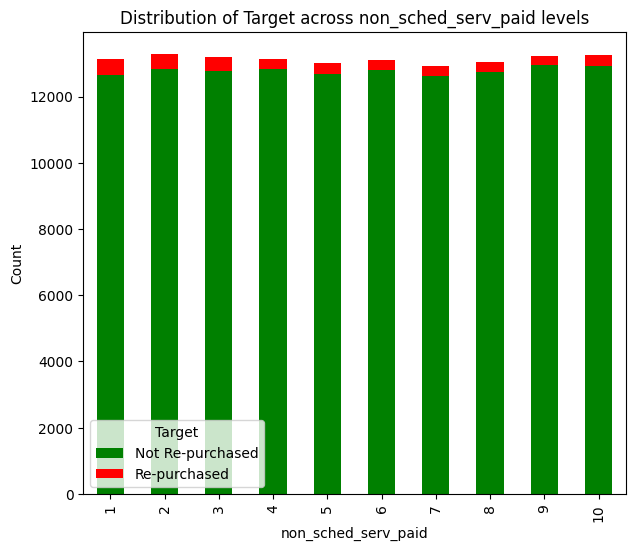

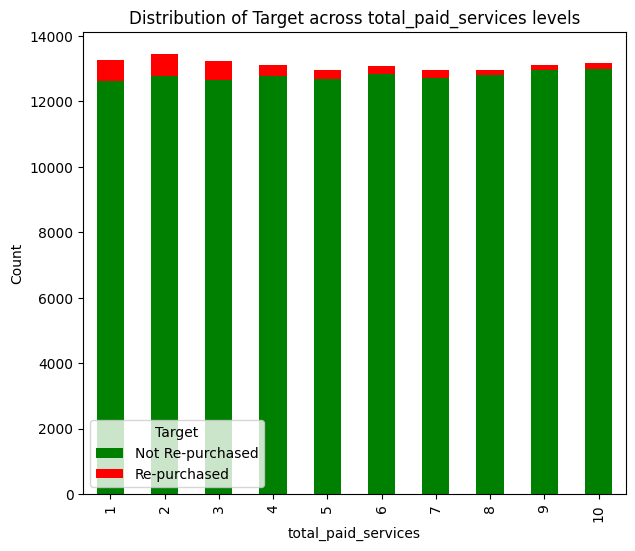

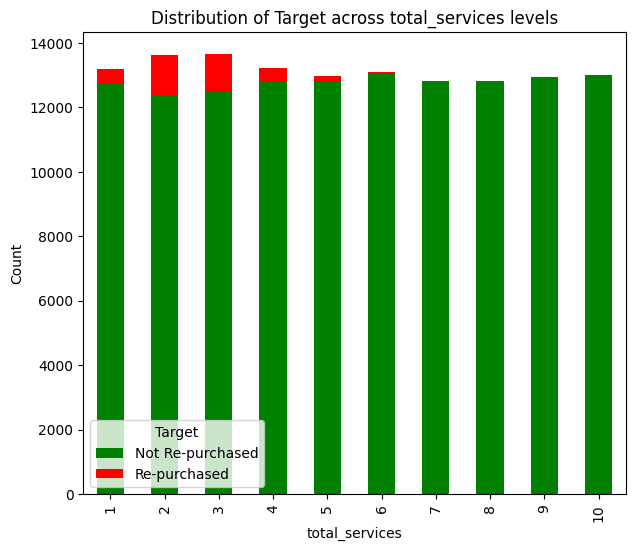

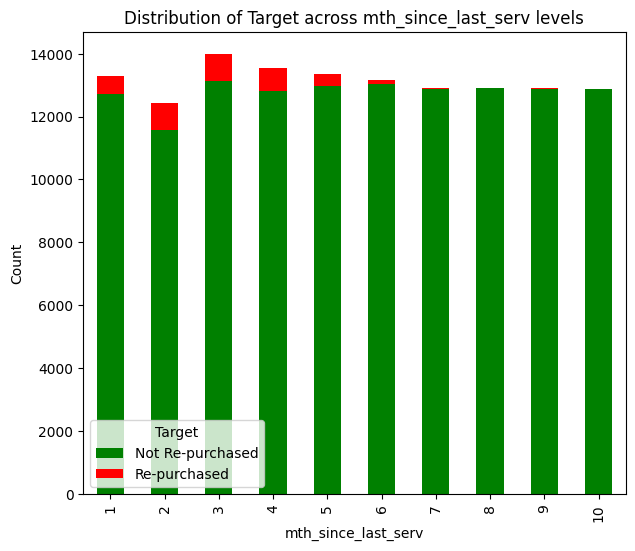

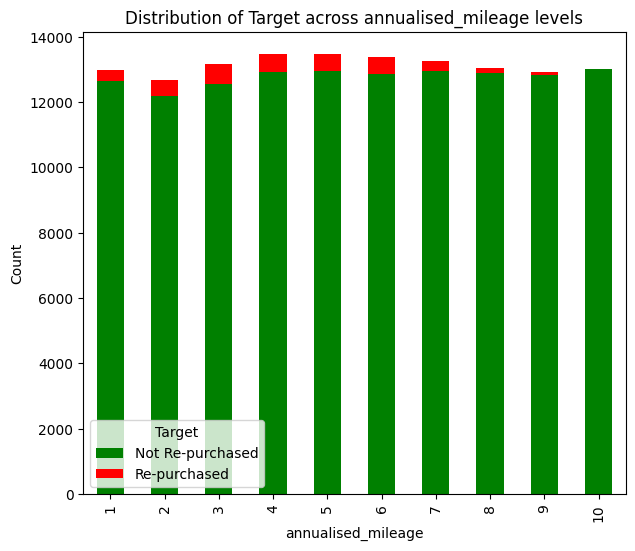

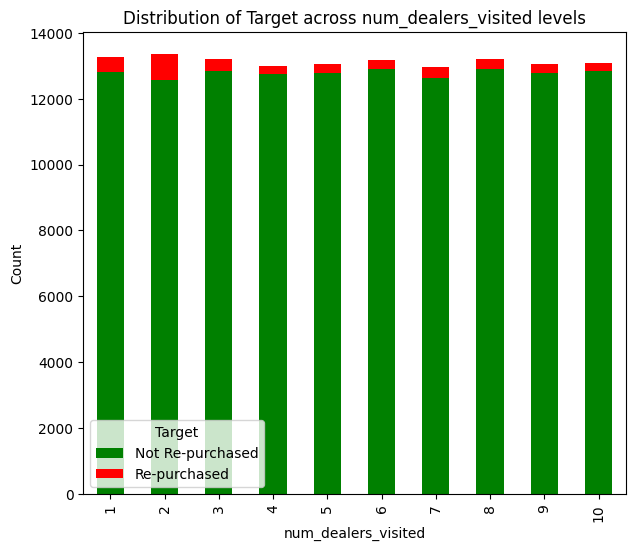

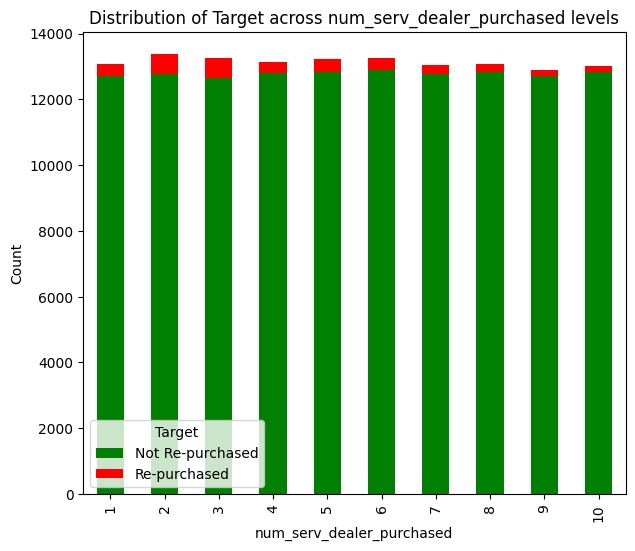

In [19]:
# Display ordinal categorical values
for col in ord_cols:
  grouped = df.groupby([col, target]).size().unstack(fill_value=0)
  ax = grouped.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(7, 6))
  ax.set_title(f'Distribution of Target across {col} levels')
  ax.set_xlabel(col)
  ax.set_ylabel('Count')
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
  ax.legend(title='Target', labels=['Not Re-purchased', 'Re-purchased'])
  plt.show()

### 5. Prepare Data

In [20]:
df_cleaned = df.copy()

In [21]:
# Dropping Identfier, and missing data variables
df_cleaned.drop(['ID', 'gender', 'age_band'], inplace=True, axis=1)

In [22]:
df_cleaned.car_model = df_cleaned.car_model.apply(lambda x: int(x.replace('model_',''))) #Converting character into numeric value

In [23]:
# Checking for dupplicate values
df_cleaned.duplicated().sum()

5184

In [24]:
# Dropping duplicates
df_cleaned.drop_duplicates(inplace=True)

In [25]:
# Creating a map to change character to numeric value
car_seg_map = {
    'LCV':1,
    'Small/Medium':2,
    'Large/SUV':3,
    'Other': 4
}
df_cleaned.car_segment = df_cleaned.car_segment.map(car_seg_map)

### 6. Split Dataset

In [26]:
y = df_cleaned.pop(target)
X = df_cleaned

In [27]:
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

In [28]:
from sklearn.model_selection import train_test_split

X_data, X_test, y_data, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, stratify=y_data, random_state=42, test_size=0.2)

### 7. Baseline Model

In [29]:
# creating a dumb model
def y_mode_(y_):
  y_mode = y_.mode()
  y_central = np.full(y_.shape[0], y_mode)
  return y_central

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Checking performance of the dumb model
train_perf = classification_report(y_train, y_mode_(y_train))
val_perf = accuracy_score(y_val, y_mode_(y_val))
test_perf = accuracy_score(y_test, y_mode_(y_test))

In [31]:
#Display the performance of the model
print(train_perf)
print(f"Validation Accuracy: {val_perf:.2%},\
      Test Accuracy: {test_perf:.2%}")

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     78483
           1       0.00      0.00      0.00      2254

    accuracy                           0.97     80737
   macro avg       0.49      0.50      0.49     80737
weighted avg       0.94      0.97      0.96     80737

Validation Accuracy: 97.21%,      Test Accuracy: 97.21%


Since the model is highly imbalanced the model shows accuracy of 97% but the precision and recall for class 1 is 0. Therefore, this model is useless.

### 8. Train Machine Learning Model

In [32]:
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Creating a LogisticRegression model pipeline
pipeline = Pipeline([
    ('underSampler', RandomUnderSampler(random_state=42)),
    ('model', LogisticRegression(random_state=42, class_weight='balanced'))
])

In [33]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('underSampler', RandomUnderSampler(random_state=42)),
                ('model',
                 LogisticRegression(class_weight='balanced', random_state=42))])

### 9. Assess Model Performance

In [34]:
y_preds = pipeline.predict(X_train)

In [35]:
print(classification_report(y_train, y_preds))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88     78483
           1       0.11      0.88      0.19      2254

    accuracy                           0.79     80737
   macro avg       0.55      0.83      0.54     80737
weighted avg       0.97      0.79      0.86     80737



In [36]:
print(f"Validation Accuracy : {100*accuracy_score(y_val, pipeline.predict(X_val)):.2f}%")
print(f"Test Accuracy : {100*accuracy_score(y_test, pipeline.predict(X_test)):.2f}%")

Validation Accuracy : 78.60%
Test Accuracy : 78.96%


In [37]:
# Tuning C=0.1
pipeline1 = Pipeline([
    ('underSampler', RandomUnderSampler(random_state=42)),
    ('model', LogisticRegression(random_state=42, class_weight='balanced', C=0.1))
])

In [38]:
pipeline1.fit(X_train, y_train)

Pipeline(steps=[('underSampler', RandomUnderSampler(random_state=42)),
                ('model',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    random_state=42))])

In [39]:
y_preds1 = pipeline1.predict(X_train)

In [40]:
print(classification_report(y_train, y_preds1))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88     78483
           1       0.11      0.88      0.19      2254

    accuracy                           0.79     80737
   macro avg       0.55      0.83      0.54     80737
weighted avg       0.97      0.79      0.86     80737



In [41]:
print(f"Validation Accuracy : {100*accuracy_score(y_val, pipeline1.predict(X_val)):.2f}%")
print(f"Testing Accuracy : {100*accuracy_score(y_test, pipeline1.predict(X_test)):.2f}%")

Validation Accuracy : 78.61%
Testing Accuracy : 78.95%


In [42]:
#Tuning C=0.01
pipeline2 = Pipeline([
    ('underSampler', RandomUnderSampler(random_state=42)),
    ('model', LogisticRegression(random_state=42, class_weight='balanced', C=0.01))
])

In [43]:
pipeline2.fit(X_train, y_train)

Pipeline(steps=[('underSampler', RandomUnderSampler(random_state=42)),
                ('model',
                 LogisticRegression(C=0.01, class_weight='balanced',
                                    random_state=42))])

In [44]:
y_preds2 = pipeline2.predict(X_train)

In [45]:
print(classification_report(y_train, y_preds2))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88     78483
           1       0.11      0.88      0.19      2254

    accuracy                           0.79     80737
   macro avg       0.55      0.83      0.54     80737
weighted avg       0.97      0.79      0.86     80737



In [46]:
print(f"Validation Accuracy : {100*accuracy_score(y_val, pipeline2.predict(X_val)):.2f}%")
print(f"Testing Accuracy : {100*accuracy_score(y_test, pipeline2.predict(X_test)):.2f}%")

Validation Accuracy : 78.61%
Testing Accuracy : 78.96%


In [47]:
# Tuning C to 0.001
pipeline3 = Pipeline([
    ('underSampler', RandomUnderSampler(random_state=42)),
    ('model', LogisticRegression(random_state=42, class_weight='balanced', C=0.001))
])

In [48]:
pipeline3.fit(X_train, y_train)

Pipeline(steps=[('underSampler', RandomUnderSampler(random_state=42)),
                ('model',
                 LogisticRegression(C=0.001, class_weight='balanced',
                                    random_state=42))])

In [49]:
y_preds3 = pipeline3.predict(X_train)

In [50]:
print(classification_report(y_train, y_preds3))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88     78483
           1       0.11      0.91      0.20      2254

    accuracy                           0.79     80737
   macro avg       0.55      0.85      0.54     80737
weighted avg       0.97      0.79      0.86     80737



In [51]:
print(f"Validation Accuracy : {100*accuracy_score(y_val, pipeline3.predict(X_val)):.2f}%")
print(f"Testing Accuracy : {100*accuracy_score(y_test, pipeline3.predict(X_test)):.2f}%")

Validation Accuracy : 78.59%
Testing Accuracy : 78.89%


In [52]:
from sklearn.metrics import PrecisionRecallDisplay, roc_curve, roc_auc_score

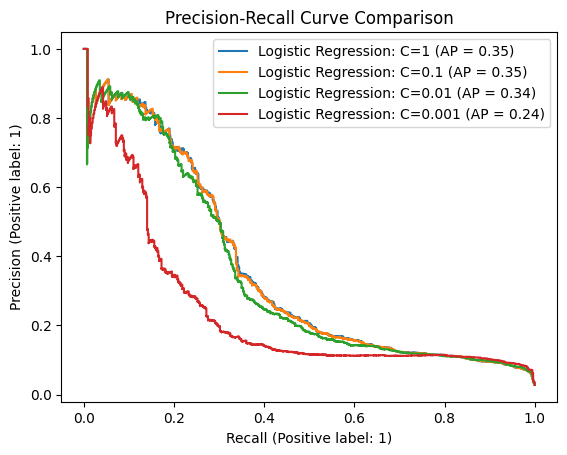

In [53]:
#Display curve for  C=1.
display = PrecisionRecallDisplay.from_estimator(pipeline, X_val, y_val, name="Logistic Regression: C=1")

# Display curve for C=0.1
display1 = PrecisionRecallDisplay.from_estimator(pipeline1, X_val, y_val, ax=display.ax_, name="Logistic Regression: C=0.1")

# Display curve for C=0.01
display2 = PrecisionRecallDisplay.from_estimator(pipeline2, X_val, y_val, ax=display.ax_, name="Logistic Regression: C=0.01")

# Display curve for C=0.001
display3 = PrecisionRecallDisplay.from_estimator(pipeline3, X_val, y_val, ax=display.ax_, name="Logistic Regression: C=0.001")

display.ax_.set_title("Precision-Recall Curve Comparison")
plt.legend(loc="upper right")
plt.show()

In [54]:
# probabilities for each model
y_probs = pipeline.predict_proba(X_test)[:, 1]
y_probs1 = pipeline1.predict_proba(X_test)[:, 1]
y_probs2 = pipeline2.predict_proba(X_test)[:, 1]
y_probs3 = pipeline3.predict_proba(X_test)[:, 1]

In [55]:
# ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_probs1)
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_probs2)
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_probs3)

In [56]:
# AUC scores
auc = roc_auc_score(y_test, y_probs)
auc1 = roc_auc_score(y_test, y_probs1)
auc2 = roc_auc_score(y_test, y_probs2)
auc3 = roc_auc_score(y_test, y_probs3)

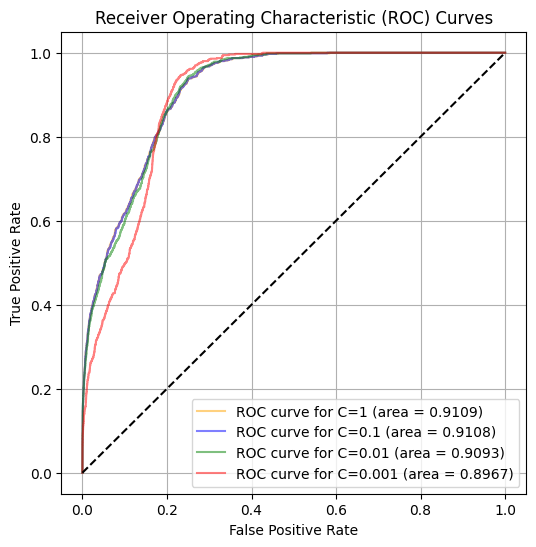

In [57]:
from sklearn.metrics import roc_curve, roc_auc_score

# Plot ROC Curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='orange', label=f'ROC curve for C=1 (area = {auc:.4f})', alpha=0.5)
plt.plot(fpr1, tpr1, color='blue', label=f'ROC curve for C=0.1 (area = {auc1:.4f})', alpha=0.5)
plt.plot(fpr2, tpr2, color='green', label=f'ROC curve for C=0.01 (area = {auc2:.4f})', alpha=0.5)
plt.plot(fpr3, tpr3, color='red', label=f'ROC curve for C=0.001 (area = {auc3:.4f})', alpha=0.5)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


From Precision Recall Curve and ROC CUrve we can observe that model with C=1 is performing the best.

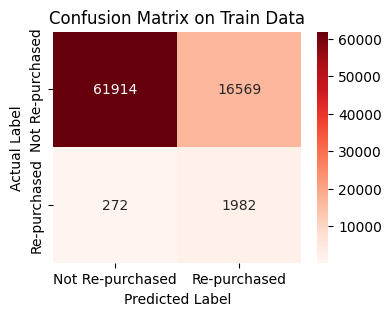

In [58]:
# Plot confusion matrix for Training data
cm = confusion_matrix(y_train, pipeline.predict(X_train))
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=["Not Re-purchased", "Re-purchased"], yticklabels=["Not Re-purchased", "Re-purchased"])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix on Train Data')
plt.show()

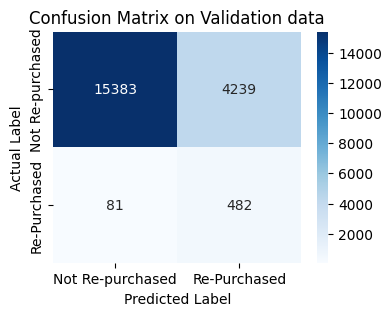

In [59]:
# Plot confusion matrix for Validation data
cm_val = confusion_matrix(y_val, pipeline.predict(X_val))
plt.figure(figsize=(4,3))
sns.heatmap(cm_val, annot=True, fmt='d', cmap="Blues", xticklabels=["Not Re-purchased", "Re-Purchased"], yticklabels=["Not Re-purchased", "Re-Purchased"])
plt.title("Confusion Matrix on Validation data")
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

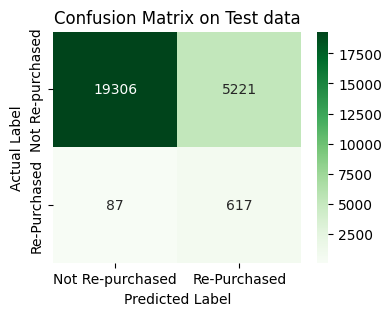

In [60]:
# Plot confusion matrix for Testing data
cm_test = confusion_matrix(y_test, pipeline.predict(X_test))
plt.figure(figsize=(4,3))
sns.heatmap(cm_test, annot=True, fmt='d', cmap="Greens", xticklabels=["Not Re-purchased", "Re-Purchased"], yticklabels=["Not Re-purchased", "Re-Purchased"])
plt.title("Confusion Matrix on Test data")
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()